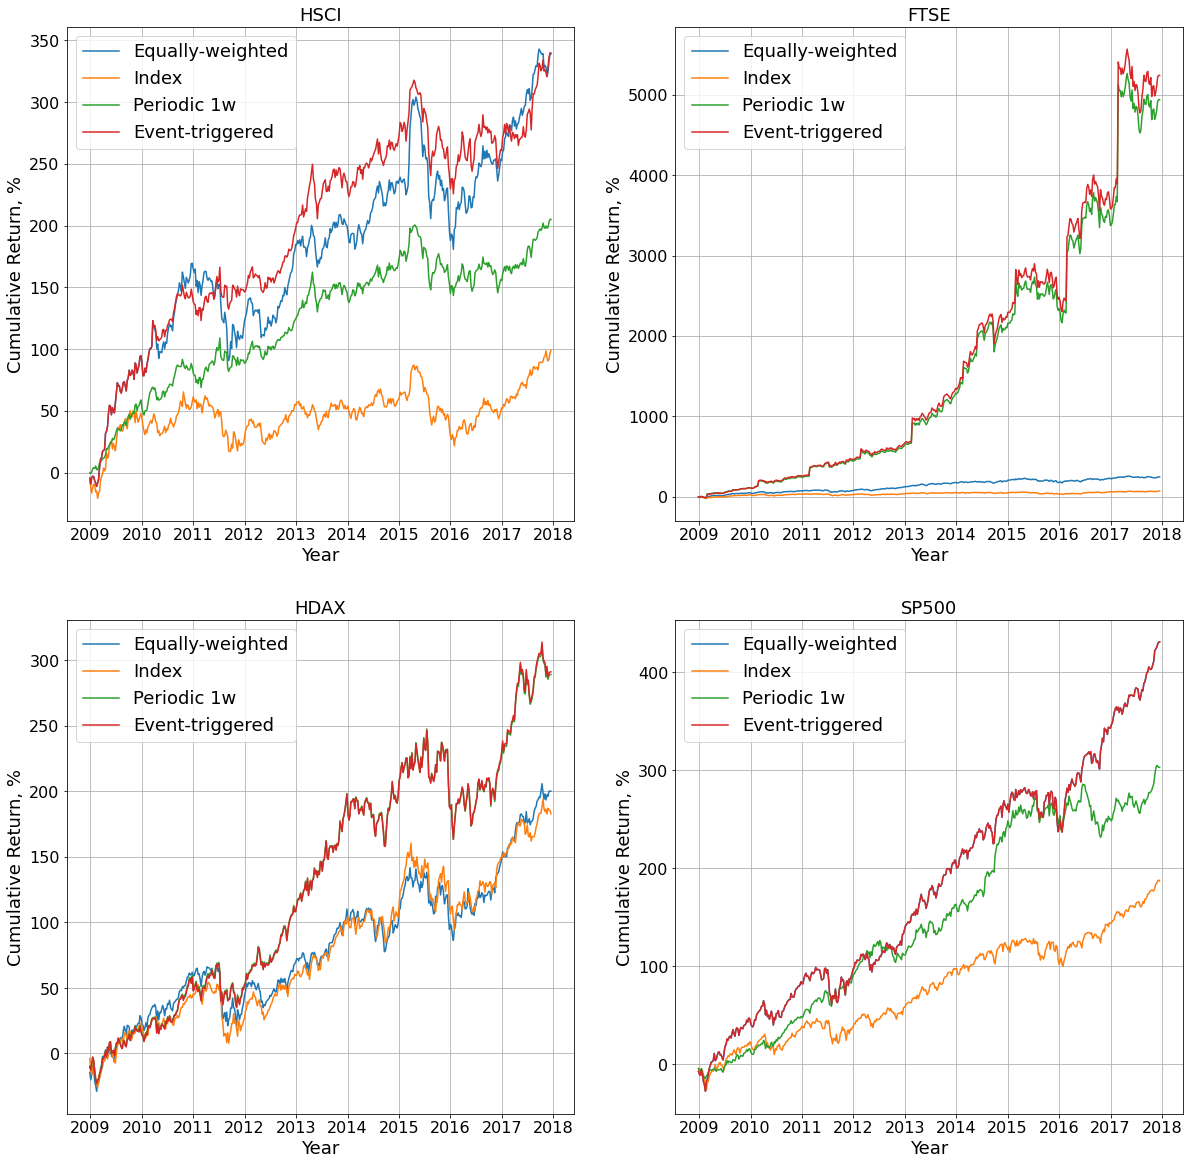

In [8]:
import pickle
import numpy as np
import datetime
import matplotlib.pyplot as plt


WEEKS = 938
dates = []
date_start = datetime.datetime.strptime("2000-01-01","%Y-%m-%d")
for i in range(WEEKS):
    dates.append(date_start + datetime.timedelta(weeks=1*i))
datasets = ['HSCI', 'FTSE', 'HDAX', 'SP500']
sim_types = ['Equally-weighted', 'Index', 'Periodic 1w', 'Event-triggered']
with open('results/cr_data.pkl', 'rb') as fp:
    cr_data = pickle.load(fp)

fig = plt.figure(figsize=(20, 20))
gs = fig.add_gridspec(2, 2)

for i, market in enumerate(datasets):
    ax = fig.add_subplot(gs[i])
    for sim_type in sim_types:
        
        data = cr_data[(market, sim_type)]

        ax.plot(dates[-WEEKS//2:], 100*data[-WEEKS//2:], label=sim_type)
    ax.set_title(market, fontsize=18)
    ax.set_xlabel('Year', fontsize=18)
    ax.set_ylabel('Cumulative Return, %', fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.legend(fontsize=18)
    ax.grid()

fig.savefig('results/cumulative_r_plot.jpg', bbox_inches='tight', pad_inches=0.2)

# %reset -f